# COVID's Impacts on Academic Performance in Colorado's School Districts
By Levi Grenier

In this project, we attempt to determine the presence of a relationship between a school district's financial background and its change in average SAT score over the course of the COVID-19 pandemic.

To do this, we apply a logistic regression and random forest classifier to a data set compiled from the Colorado Department of Education's school funding worksheets and aggregate SAT data.

#### Data Set and Exploratory Analysis

In [47]:
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.preprocessing import Normalizer
import pandas as pd
import graphviz
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
import graphviz

Reading the data:

In [48]:
df_raw = pd.read_csv("COVIDProjectDataR.csv")
print(df_raw.columns)
df_raw.corr()

Index(['FPC', 'CIPC', 'OLPC', 'TARPC', 'Adj_TOTAL_PROG_FUND',
       'Adj_TOTAL_PROG_FUND_PP', 'ASSED_VAL', 'ASSED_VAL_PP', 'CoL', 'CoL_PP',
       'OVERRIDE_REV', 'OVERRIDE_REV_PP', 'STATE_SHARE', 'MILL_PERCENT_TP',
       'OVERRIDE_MILL', 'OVERRIDE_PERCENT_TP', 'COMPOSITE_PERCENT_DIFF',
       'COMPOSITE_DIFF', 'BETTER'],
      dtype='object')


,FPC,CIPC,OLPC,TARPC,Adj_TOTAL_PROG_FUND,Adj_TOTAL_PROG_FUND_PP,ASSED_VAL,ASSED_VAL_PP,CoL,CoL_PP,OVERRIDE_REV,OVERRIDE_REV_PP,STATE_SHARE,MILL_PERCENT_TP,OVERRIDE_MILL,OVERRIDE_PERCENT_TP,COMPOSITE_PERCENT_DIFF,COMPOSITE_DIFF,BETTER
FPC,1.000000,0.349533,0.190102,0.856899,0.999354,-0.231518,0.898904,-0.159272,0.775113,-0.032329,0.924197,0.271594,-0.011630,-0.161406,0.484158,0.315315,-0.033248,-0.029952,-0.024271
CIPC,0.349533,1.000000,-0.011507,0.353519,0.343471,-0.127774,0.181853,-0.106167,0.467845,0.091586,0.270770,0.169161,0.071355,-0.109468,0.467473,0.198357,0.016312,0.021634,0.098330
OLPC,0.190102,-0.011507,1.000000,0.073953,0.181278,-0.169850,0.056239,-0.125322,0.117148,-0.085634,0.064122,-0.084534,0.205965,-0.133626,0.146618,-0.075537,0.272072,0.269789,0.065781
TARPC,0.856899,0.353519,0.073953,1.000000,0.871641,-0.122670,0.840299,-0.148776,0.703360,-0.037474,0.902714,0.256632,0.007011,-0.153097,0.455563,0.287037,0.006273,0.011096,0.050998
Adj_TOTAL_PROG_FUND,0.999354,0.343471,0.181278,0.871641,1.000000,-0.217702,0.907502,-0.153375,0.772724,-0.032539,0.934364,0.279034,-0.016742,-0.155843,0.483411,0.321531,-0.032177,-0.028943,-0.020979
Adj_TOTAL_PROG_FUND_PP,-0.231518,-0.127774,-0.169850,-0.122670,-0.217702,1.000000,-0.066194,0.541775,-0.219689,0.085951,-0.102741,0.370387,-0.170121,0.476651,-0.137088,0.257851,-0.019958,-0.043361,-0.182124
ASSED_VAL,0.898904,0.181853,0.056239,0.840299,0.907502,-0.066194,1.000000,0.080239,0.713158,0.017112,0.958456,0.416203,-0.251191,0.082644,0.324426,0.444964,-0.057230,-0.053784,-0.010636
ASSED_VAL_PP,-0.159272,-0.106167,-0.125322,-0.148776,-0.153375,0.541775,0.080239,1.000000,-0.122154,0.222459,-0.073076,0.481074,-0.643849,0.992536,-0.212593,0.413964,-0.041935,-0.040716,-0.082024
CoL,0.775113,0.467845,0.117148,0.703360,0.772724,-0.219689,0.713158,-0.122154,1.000000,0.305145,0.744594,0.300638,-0.027829,-0.125370,0.527842,0.344932,-0.041188,-0.032818,0.053340
CoL_PP,-0.032329,0.091586,-0.085634,-0.037474,-0.032539,0.085951,0.017112,0.222459,0.305145,1.000000,-0.001870,0.362890,-0.324644,0.214134,0.258786,0.364296,-0.023913,-0.003289,0.037713


Plotting change in performance vs MLO revenue per pupil:

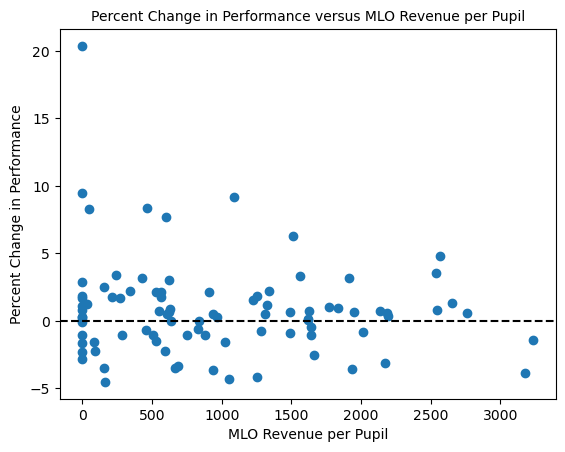

In [49]:
plt.axhline(y=0, linestyle = '--', color = 'black')
plt.scatter(df_raw['OVERRIDE_REV_PP'],df_raw['COMPOSITE_PERCENT_DIFF'])
plt.title("Percent Change in Performance versus MLO Revenue per Pupil", size = 10)
plt.xlabel("MLO Revenue per Pupil")
plt.ylabel("Percent Change in Performance")
#plt.savefig("PerformanceChangevsMLO_REV_PP.svg", format = 'svg')
plt.show()

Plotting change in performance vs funded pupil count:

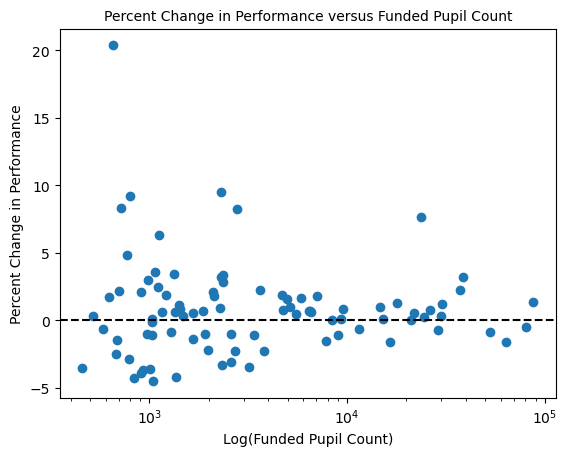

In [50]:
plt.axhline(y=0, linestyle = '--', color = 'black')
plt.scatter(df_raw['FPC'], df_raw['COMPOSITE_PERCENT_DIFF'])
plt.title("Percent Change in Performance versus Funded Pupil Count", size = 10)
plt.xlabel("Log(Funded Pupil Count)")
plt.xscale('log')
plt.ylabel("Percent Change in Performance")
#plt.savefig("PerformanceChangevsFPC.svg", format = 'svg')
plt.show()

Now we consider the appropriate scaling for the data. 

In [62]:
df_raw = pd.read_csv("COVIDProjectData.csv")
df = df_raw[['FPC', 'CIPC', 'OLPC', 'TARPC', 'Adj_TOTAL_PROG_FUND', 'ASSED_VAL',
       'CoL', 'STATE_SHARE', 'OVERRIDE_MILL', 'OVERRIDE_PERCENT_TP', 'COMPOSITE_PERCENT_DIFF']]
print(df_raw.columns)
df.corr()

Index(['FPC', 'CIPC', 'OLPC', 'TARPC', 'Adj_TOTAL_PROG_FUND',
       'Adj_TOTAL_PROG_FUND_PP', 'ASSED_VAL', 'ASSED_VAL_PP', 'CoL', 'CoL_PP',
       'OVERRIDE_REV', 'OVERRIDE_REV_PP', 'STATE_SHARE', 'MILL_PERCENT_TP',
       'OVERRIDE_MILL', 'OVERRIDE_PERCENT_TP', 'COMPOSITE_PERCENT_DIFF',
       'COMPOSITE_DIFF', 'BETTER'],
      dtype='object')


,FPC,CIPC,OLPC,TARPC,Adj_TOTAL_PROG_FUND,ASSED_VAL,CoL,STATE_SHARE,OVERRIDE_MILL,OVERRIDE_PERCENT_TP,COMPOSITE_PERCENT_DIFF
FPC,1.000000,0.349533,0.190102,0.856899,0.999354,0.898904,0.775113,-0.011630,0.484158,0.315315,-0.033248
CIPC,0.349533,1.000000,-0.011507,0.353519,0.343471,0.181853,0.467845,0.071355,0.467473,0.198357,0.016312
OLPC,0.190102,-0.011507,1.000000,0.073953,0.181278,0.056239,0.117148,0.205965,0.146618,-0.075537,0.272072
TARPC,0.856899,0.353519,0.073953,1.000000,0.871641,0.840299,0.703360,0.007011,0.455563,0.287037,0.006273
Adj_TOTAL_PROG_FUND,0.999354,0.343471,0.181278,0.871641,1.000000,0.907502,0.772724,-0.016742,0.483411,0.321531,-0.032177
ASSED_VAL,0.898904,0.181853,0.056239,0.840299,0.907502,1.000000,0.713158,-0.251191,0.324426,0.444964,-0.057230
CoL,0.775113,0.467845,0.117148,0.703360,0.772724,0.713158,1.000000,-0.027829,0.527842,0.344932,-0.041188
STATE_SHARE,-0.011630,0.071355,0.205965,0.007011,-0.016742,-0.251191,-0.027829,1.000000,0.107333,-0.485567,0.034647
OVERRIDE_MILL,0.484158,0.467473,0.146618,0.455563,0.483411,0.324426,0.527842,0.107333,1.000000,0.600083,-0.046232
OVERRIDE_PERCENT_TP,0.315315,0.198357,-0.075537,0.287037,0.321531,0.444964,0.344932,-0.485567,0.600083,1.000000,-0.121762


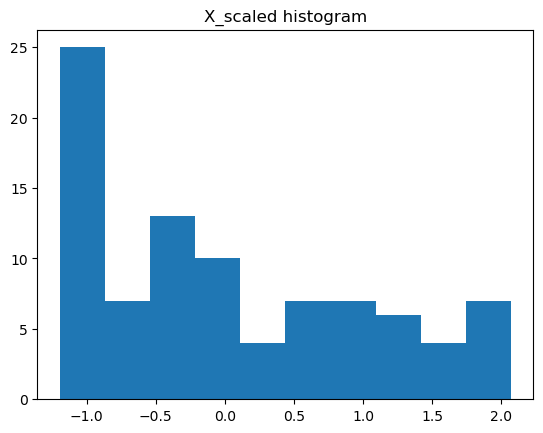

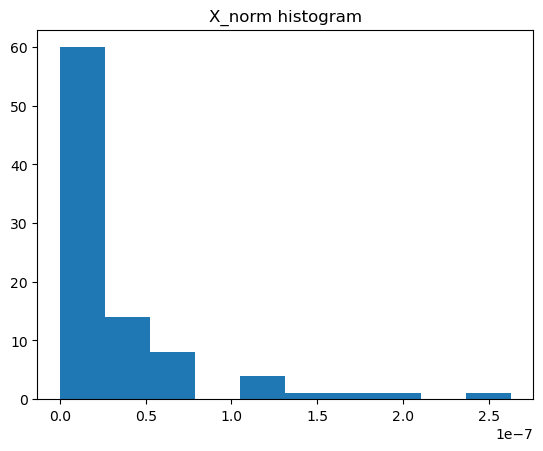

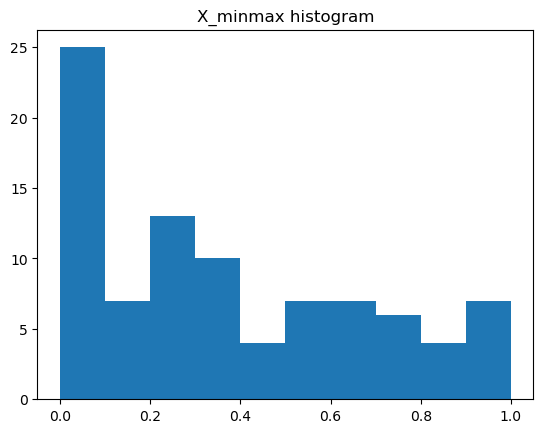

In [52]:
# Scaling our data
col = 9  # Which feature to examine

# Standard Scale
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df)
df_scaled = ss.transform(df)
plt.hist(df_scaled[:,col])
plt.title("X_scaled histogram")
plt.show()

# Normalized
from sklearn.preprocessing import Normalizer
normalized = Normalizer()
normalized.fit(df)
df_norm = normalized.transform(df)
plt.hist(df_norm[:,col])
plt.title("X_norm histogram")
plt.show()

# MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_minmax = scaler.transform(df)
plt.hist(df_minmax[:,col])
plt.title("X_minmax histogram")
plt.show()

In [53]:
X = df_scaled[:,:10]
y = df_scaled[:,10]
y_bool = df_raw['BETTER']

### Logistic Regression

In [54]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bool, test_size = 0.2)

# Declare and train our model
model_log = LogisticRegression(class_weight = 'balanced')
model_log.fit(X_train, y_train)

# Evaluate the model 
testing_accu = model_log.score(X_test, y_test)
y_hat = model_log.predict(X_test)
print(f"Testing accuracy: {testing_accu}\n")
    
# Setup to get f-score and cv
scorerVar = make_scorer(f1_score, pos_label=1)
score = model_selection.cross_val_score(model_log, X_test, y_test, cv = 5, scoring = scorerVar)
print(f"Our estimated f1-value is: {sum(score)/len(score)}\n")

# Confusion matrix
conf_matrix = sk.metrics.confusion_matrix(y_test, y_hat)
print(f"Our confusion matrix: \n{conf_matrix}\n")
print(conf_matrix[0,1])

# Classification report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
class_report = metrics.classification_report(y_test, y_hat)
print(f"Our classifications report: \n{class_report}")



Testing accuracy: 0.3333333333333333

Our estimated f1-value is: 0.5599999999999999

Our confusion matrix: 
[[ 2  2]
 [10  4]]

2
Our classifications report: 
              precision    recall  f1-score   support

           0       0.17      0.50      0.25         4
           1       0.67      0.29      0.40        14

    accuracy                           0.33        18
   macro avg       0.42      0.39      0.33        18
weighted avg       0.56      0.33      0.37        18



C:\Users\levig\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.5291666666666656


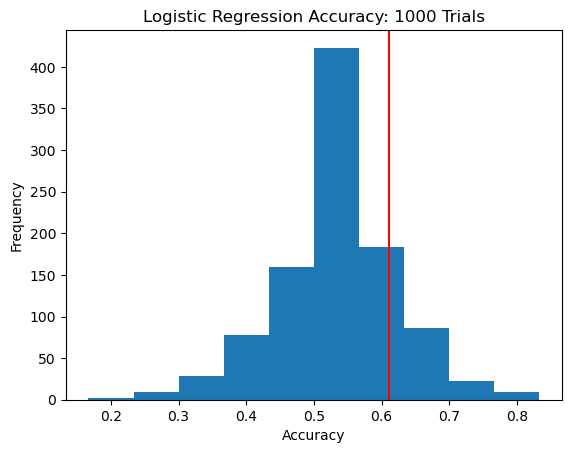

Confusion matrix: [[0.332, 6.532], [1.943, 9.193]]
Shuffle/split cross validation score: 0.5233888888888889 and standard deviation: 0.09891009448040913


In [55]:
# Creating the accuracy histogram
accuracy = []
element1 = []
element2 = []
element3 = []
element4 = []

for i in range(1,1001):
    X_train, X_test, y_train, y_test = train_test_split(X, y_bool, test_size = 0.2)
    # Declare and train our model
    model_log = LogisticRegression()
    model_log.fit(X_train, y_train)

    # Evaluate the model 
    testing_accu = model_log.score(X_test, y_test)
    accuracy.append(testing_accu)
    
    y_hat = model_log.predict(X_test)
    conf_matrix = sk.metrics.confusion_matrix(y_test, y_hat)
    element1.append(conf_matrix[0,0])
    element2.append(conf_matrix[0,1])
    element3.append(conf_matrix[1,0])
    element4.append(conf_matrix[1,1])
    
print(sum(accuracy)/len(accuracy))
plt.hist(accuracy)
plt.axvline(x=0.61111, ymin=0, ymax=250, color = 'red')
plt.title("Logistic Regression Accuracy: 1000 Trials")
plt.ylabel("Frequency")
plt.xlabel("Accuracy")
#plt.savefig("LogisticHistogram.svg", format="svg")
plt.show()


# The averaged confusion matrix
conf_matrix_ave = [[sum(element1)/len(element1), sum(element2)/len(element2)],
                   [sum(element3)/len(element3), sum(element4)/len(element4)]]
print(f"Confusion matrix: {conf_matrix_ave}")

# The shuffle/split cross validation accuracy and standard deviation
scores = cross_val_score(model_log, X, y_bool, cv = ShuffleSplit(1000, test_size = 0.2))
print(f"Shuffle/split cross validation score: {scores.mean()} and standard deviation: {scores.std()}")

### Random Forest

In [56]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bool, test_size = 0.2)

# Fitting a basic decision forest
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=3)
rf_clf.fit(X_train, y_train)

# Confusion matrix
y_hat = rf_clf.predict(X_test)
conf_matrix = sk.metrics.confusion_matrix(y_test, y_hat)
print(f"Our confusion matrix: \n{conf_matrix}\n")

# Accuracy score
score = rf_clf.score(X_test, y_test)
print(f"Mean accuracy: {score}")

Our confusion matrix: 
[[0 9]
 [1 8]]

Mean accuracy: 0.4444444444444444


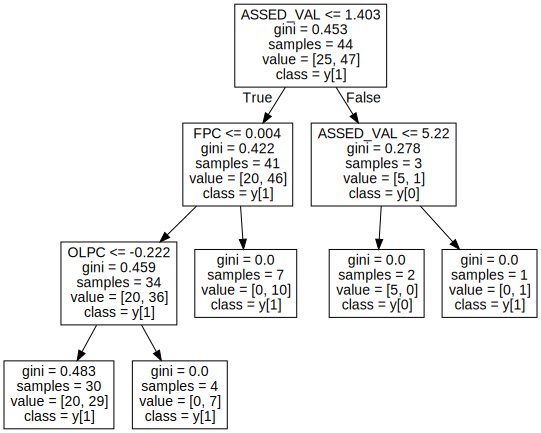

In [57]:
# Visualizing a decision tree from our forest
index = 5     # number specifies which tree is displayed
tree = rf_clf.estimators_[index]
from IPython.display import display
columns = features2
display(graphviz.Source(export_graphviz(tree, feature_names=columns, class_names=True, out_file=None)))

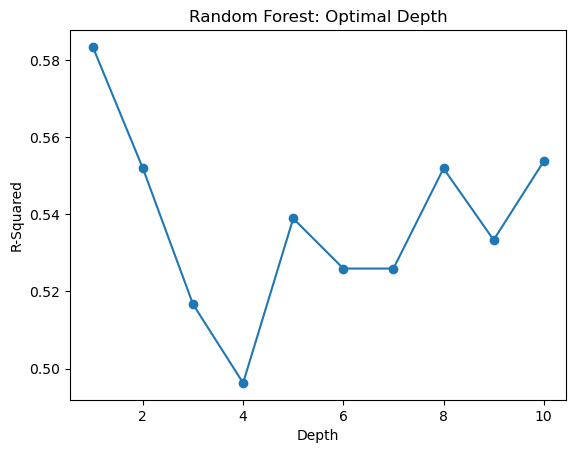

In [58]:
# Finding our optimal depth
r_squared = []
max_depth = 11
for i in range(1,max_depth):
    sub_r = []
    for sub_i in range(1,31):
        X_train, X_test, y_train, y_test = train_test_split(X, y_lin, test_size = 0.2)
        rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=i)
        rf_clf.fit(X_train, y_train)
        r2 = rf_clf.score(X_test, y_test)
        sub_r.append(r2)
    r_squared.append(sum(sub_r)/len(sub_r))
    
plt.plot(np.arange(1,max_depth), r_squared, 'o-')
plt.title("Random Forest: Optimal Depth")
plt.ylabel("R-Squared")
plt.xlabel("Depth")
#plt.savefig("RandomForestClsDepth.svg", format="svg")
plt.show()

Average accuracy for manual CV: 0.5700000000000002


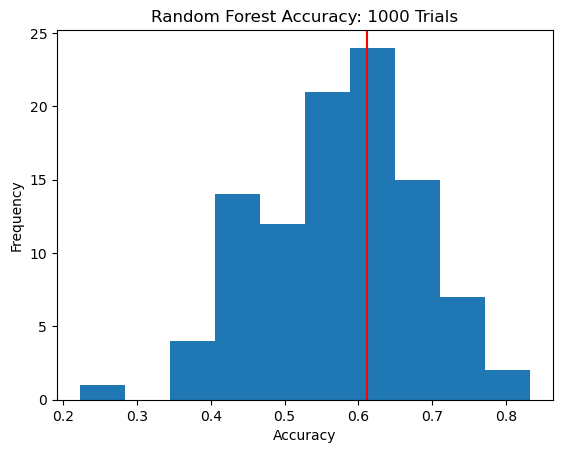

Confusion matrix: [[0.52, 6.53], [1.21, 9.74]]
Shuffle/split cross validation score: 0.5708888888888889 and standard deviation: 0.10246685703252276


In [60]:
# Creating the second accuracy histogram
accuracy = []
element1 = []
element2 = []
element3 = []
element4 = []

for i in range(1,1001):
    X_train, X_test, y_train, y_test = train_test_split(X, y_bool, test_size = 0.2)
    # Declare and train our model
    model_rdf = RandomForestClassifier(n_estimators = 10, max_depth = 1)
    model_rdf.fit(X_train, y_train)

    # Evaluate the model 
    testing_accu = model_rdf.score(X_test, y_test)
    accuracy.append(testing_accu)
    
    y_hat = model_rdf.predict(X_test)
    conf_matrix = sk.metrics.confusion_matrix(y_test, y_hat)
    element1.append(conf_matrix[0,0])
    element2.append(conf_matrix[0,1])
    element3.append(conf_matrix[1,0])
    element4.append(conf_matrix[1,1])
    
print(f"Average accuracy for manual CV: {sum(accuracy)/len(accuracy)}")
plt.hist(accuracy)
plt.axvline(x=0.61111, ymin=0, ymax=250, color = 'red')
plt.title("Random Forest Accuracy: 1000 Trials")
plt.ylabel("Frequency")
plt.xlabel("Accuracy")
#plt.savefig("RandomForestHistogram.svg", format="svg")
plt.show()

# The averaged confusion matrix
conf_matrix_ave = [[sum(element1)/len(element1), sum(element2)/len(element2)],
                   [sum(element3)/len(element3), sum(element4)/len(element4)]]
print(f"Confusion matrix: {conf_matrix_ave}")

# The shuffle-split cross validation scors and standard deviation.
scores = cross_val_score(model_rdf, X, y_bool, cv = ShuffleSplit(1000, test_size = 0.2))
print(f"Shuffle/split cross validation score: {scores.mean()} and standard deviation: {scores.std()}")